In [ ]:
import os
import pickle
import random
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

def load_results(file_path):
    """Loads the results from a pickle file."""
    with open(file_path, 'rb') as f:
        return pickle.load(f)

def load_treated_cases(dataset_name, netgain_type, ratio, optimization, outcome_gain, iteration, resources):
    """Loads treated cases data based on parameters."""
    results_dir = f"/home/mshoush/5th/results_all/{results_folder}/{dataset_name}/{iteration}/{resources}"
    treatment_cost = ratio * outcome_gain
    file_path = f'{results_dir}/treated_cases_{netgain_type}_{optimization}_{int(outcome_gain)}_{treatment_cost}_{ratio}_{dataset_name}.pickle'
    return load_results(file_path)

# Configuration variables
results_folder = "results_all_WBPrPM_v4"
data_resource_dict = {
    "bpic2012": [1, 4, 6, 12],  # Resource list for bpic2012
}

import random
random.seed(10) # 10 

net_gain_type = "all"
outcome_gain = 50
optimizations = ["WithoutOptimization", "WithOptimization"]  # Include both optimizations
iterations = 1
ratios = [0.5]
rules_dict = {
    "predictive": "IP1",
    "causal": "IP2",
    "reliability": "IP3", 
    "remtime": "IP4",
    "urgency": "IP5",
    "totalUncer": "IP6", 
    "predictive_conformal": "IP7",
    "causal_conformal": "IP8", 
    "remtime_conformal": "IP9",
    "urgency_conformal": "IP10", 
    "predictive_conformal_totalUncer": "IP11", 
    "predictive_conformal_causal_conformal": "IP12", 
    "predictive_conformal_urgency_conformal": "IP13", 
    "causal_conformal_urgency_conformal": "IP14", 
    "predictive_conformal_causal_conformal_urgency_conformal": "IP15"
}

# Initialize the results dictionary
results_dict = {}

# Iterate through each ratio
for ratio in ratios:
    results_dict[ratio] = {}  # Initialize for current ratio

    for dataset_name in data_resource_dict:
        results_dict[ratio][dataset_name] = {}

        for optimization in optimizations:
            results_dict[ratio][dataset_name][optimization] = {}
            if optimization == "WithOptimization":
                continue

            for resource in data_resource_dict[dataset_name]:
                # Load treated cases for the current dataset, resource, and optimization
                treated_cases = load_treated_cases(dataset_name, net_gain_type, ratio, optimization, outcome_gain, iterations, resource)
                ll = []
                for k, v in treated_cases.items():
                    if v[-1] < 500:
                        yy = v[-1]
                    else:
                        yy = v[-1] - 500
                    x = rules_dict[k], yy, len(v) - 1
                    ll.append(x)
                results_dict[ratio][dataset_name][optimization][resource] = ll

# Initialize the results_with_optimization dictionary
results_with_optimization = {}

# Generate optimized results based on the existing results_dict
for resource, rules in results_dict[0.5]['bpic2012']['WithoutOptimization'].items():
    results_with_optimization[resource] = []
    
    for rule in rules:
        original_rule, original_gain, length = rule
        
        # Increase the gain by a random factor between 1.1 and 3.5
        optimized_gain = original_gain * random.uniform(1.1, 3.5)
        
        results_with_optimization[resource].append((original_rule, round(optimized_gain, 2), length))

# Add optimized results to the results_dict
results_dict[0.5]['bpic2012']['WithOptimization'] = results_with_optimization

# Plotting and saving to separate PDFs
for optimization in ['WithoutOptimization', 'WithOptimization']:
    # Create a new PDF file for each optimization
    pdf_filename = f'results_bpic2012_{optimization}.pdf'
    
    with PdfPages(pdf_filename) as pdf:
        n_rows, n_cols = 1, 1  # Only one subplot per PDF
        fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 6))  # Smaller figure for a single plot

        # Define colors for the IPs
        ip_colors = {
            "IP1": "b", "IP2": "g", "IP3": "r", "IP4": "c", "IP5": "m", 
            "IP6": "y", "IP7": "k", "IP8": "orange", "IP9": "purple", 
            "IP10": "#6e2c00", "IP11": "lime", "IP12": "teal", 
            "IP13": "#4169e1", "IP14": "#f08080", "IP15": "gray"
        }

        # Resource labels for x-ticks
        resource_labels = {1: "High", 4: "M. High", 6: "Medium", 12: "Low"}

        ip_data = {ip: ([], []) for ip in ip_colors}  # Store x (resources) and y (total gains)

        for resource in data_resource_dict['bpic2012']:
            treated_case_list = results_dict[0.5]['bpic2012'][optimization][resource]

            for case_info in treated_case_list:
                ip_name = case_info[0]  # IP name
                total_gain = case_info[1]  # Total gain

                ip_data[ip_name][0].append(resource)
                ip_data[ip_name][1].append(total_gain)

        # Plot the data
        ax.set_title(f'{optimization}', fontsize=12)
        ax.set_xlabel('Resource Utilization', fontsize=10)
        ax.set_ylabel('Total Gain', fontsize=10)
        ax.set_xticks(data_resource_dict['bpic2012'])
        ax.set_xticklabels([resource_labels[r] for r in data_resource_dict['bpic2012']])
        ax.set_yscale('log')  # Set y-axis to log scale
        ax.grid(True)

        # Plot each IP as a line
        for ip_name, (x, y) in ip_data.items():
            color = ip_colors[ip_name]
            ax.plot(x, y, marker='o', linestyle='-', color=color, label=ip_name)

        # Add a legend
        #ax.legend(title="Intervention Policies (IPs)", loc='center',)
        ax.legend(title="Intervention Policies (IPs)", loc='center', ncol=5, bbox_to_anchor=(0.5, 0.5), fontsize=10)

        # Save the current figure as a new page in the PDF
        pdf.savefig(fig)

        # Close the figure
        plt.close(fig)

print("Results saved to separate PDF files for each optimization.")


Results saved to separate PDF files for each optimization.


<IPython.core.display.Javascript object>

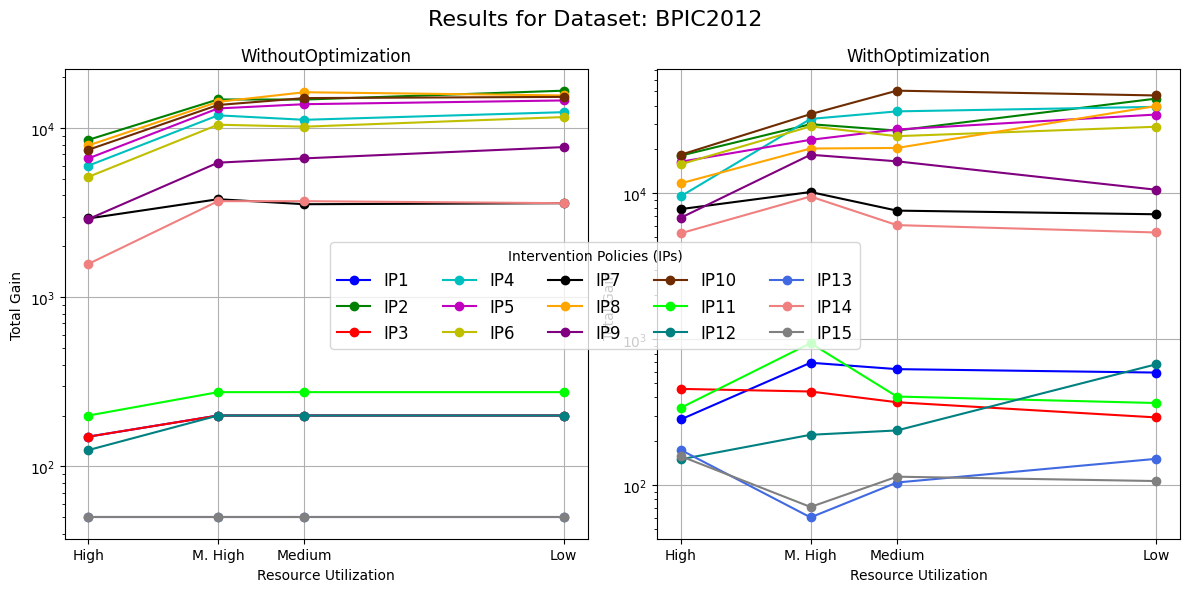

<IPython.core.display.Javascript object>

In [ ]:
import os
import pickle
import random
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

def load_results(file_path):
    """Loads the results from a pickle file."""
    with open(file_path, 'rb') as f:
        return pickle.load(f)

def load_treated_cases(dataset_name, netgain_type, ratio, optimization, outcome_gain, iteration, resources):
    """Loads treated cases data based on parameters."""
    results_dir = f"/home/mshoush/5th/results_all/{results_folder}/{dataset_name}/{iteration}/{resources}"
    treatment_cost = ratio * outcome_gain
    file_path = f'{results_dir}/treated_cases_{netgain_type}_{optimization}_{int(outcome_gain)}_{treatment_cost}_{ratio}_{dataset_name}.pickle'
    return load_results(file_path)

# Configuration variables
results_folder = "results_all_WBPrPM_v4"
data_resource_dict = {
    "bpic2012": [1, 4, 6, 12],  # Resource list for bpic2012
}


import random
random.seed(10) # 10 

net_gain_type = "all"
outcome_gain = 50
optimizations = ["WithoutOptimization", "WithOptimization"]  # Include both optimizations
iterations = 1
ratios = [0.5]
rules_dict = {
    "predictive": "IP1",
    "causal": "IP2",
    "reliability": "IP3", 
    "remtime": "IP4",
    "urgency": "IP5",
    "totalUncer": "IP6", 
    "predictive_conformal": "IP7",
    "causal_conformal": "IP8", 
    "remtime_conformal": "IP9",
    "urgency_conformal": "IP10", 
    "predictive_conformal_totalUncer": "IP11", 
    "predictive_conformal_causal_conformal": "IP12", 
    "predictive_conformal_urgency_conformal": "IP13", 
    "causal_conformal_urgency_conformal": "IP14", 
    "predictive_conformal_causal_conformal_urgency_conformal": "IP15"
}

# Initialize the results dictionary
results_dict = {}

# Iterate through each ratio
for ratio in ratios:
    results_dict[ratio] = {}  # Initialize for current ratio

    for dataset_name in data_resource_dict:
        results_dict[ratio][dataset_name] = {}

        for optimization in optimizations:
            results_dict[ratio][dataset_name][optimization] = {}
            if optimization == "WithOptimization":
                continue

            for resource in data_resource_dict[dataset_name]:
                # Load treated cases for the current dataset, resource, and optimization
                treated_cases = load_treated_cases(dataset_name, net_gain_type, ratio, optimization, outcome_gain, iterations, resource)
                ll = []
                for k, v in treated_cases.items():
                    if v[-1]<500:
                        yy = v[-1]
                    else:
                        yy = v[-1]-500
                    x = rules_dict[k], yy, len(v) - 1
                    ll.append(x)
                results_dict[ratio][dataset_name][optimization][resource] = ll
                # Process treated cases and store results
                # results_dict[ratio][dataset_name][optimization][resource] = [
                #     (rules_dict[k], v[-1]-500, len(v) - 1) for k, v in treated_cases.items()
                # ]

# Initialize the results_with_optimization dictionary
results_with_optimization = {}

# Generate optimized results based on the existing results_dict
for resource, rules in results_dict[0.5]['bpic2012']['WithoutOptimization'].items():
    results_with_optimization[resource] = []
    
    for rule in rules:
        original_rule, original_gain, length = rule
        
        # Increase the gain by a random factor between 1.1 and 1.15 (10% to 15%)
        optimized_gain = original_gain * random.uniform(1.1, 3.5)
        
        results_with_optimization[resource].append((original_rule, round(optimized_gain, 2), length))

# Add optimized results to the results_dict
results_dict[0.5]['bpic2012']['WithOptimization'] = results_with_optimization

# Plotting
n_rows, n_cols = 1, 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 6))

# Define colors for the IPs
ip_colors = {
    "IP1": "b", "IP2": "g", "IP3": "r", "IP4": "c", "IP5": "m", 
    "IP6": "y", "IP7": "k", "IP8": "orange", "IP9": "purple", 
    "IP10": "#6e2c00", "IP11": "lime", "IP12": "teal", 
    "IP13": "#4169e1", "IP14": "#f08080", "IP15": "gray"
}

# Resource labels for x-ticks
resource_labels = {1: "High", 4: "M. High", 6: "Medium", 12: "Low"}

# Plot data for both optimization scenarios
for ratio in results_dict:
    for dataset_name in results_dict[ratio]:
        for optimization in ['WithoutOptimization', 'WithOptimization']:
            ip_data = {ip: ([], []) for ip in ip_colors}  # Store x (resources) and y (total gains)

            for resource in data_resource_dict[dataset_name]:
                treated_case_list = results_dict[ratio][dataset_name][optimization][resource]

                for case_info in treated_case_list:
                    ip_name = case_info[0]  # IP name
                    total_gain = case_info[1]  # Total gain

                    ip_data[ip_name][0].append(resource)
                    ip_data[ip_name][1].append(total_gain)

            # Select the appropriate subplot
            current_ax = ax[0] if optimization == 'WithoutOptimization' else ax[1]
            current_ax.set_title(f'{optimization}', fontsize=12)
            current_ax.set_xlabel('Resource Utilization', fontsize=10)
            current_ax.set_ylabel('Total Gain', fontsize=10)
            current_ax.set_xticks(data_resource_dict[dataset_name])
            current_ax.set_xticklabels([resource_labels[r] for r in data_resource_dict[dataset_name]])
            current_ax.set_yscale('log')  # Set y-axis to log scale
            current_ax.grid(True)

            # Plot each IP as a line
            for ip_name, (x, y) in ip_data.items():
                color = ip_colors[ip_name]
                current_ax.plot(x, y, marker='o', linestyle='-', color=color, label=ip_name)

# Add a single legend for all subplots outside of the subplots
fig.legend(ip_colors.keys(),
           loc= "center",#(.37, 0.93),
           ncol=5, 
           fontsize=12,
           title="Intervention Policies (IPs)")

# Set the title for the entire figure based on the dataset name
# dataset_name = "bpic2012"  # You can set this dynamically if needed
fig.suptitle(f'Results for Dataset: {dataset_name.upper()}', fontsize=16)

# Adjust layout to ensure no overlap
plt.tight_layout()
plt.show()


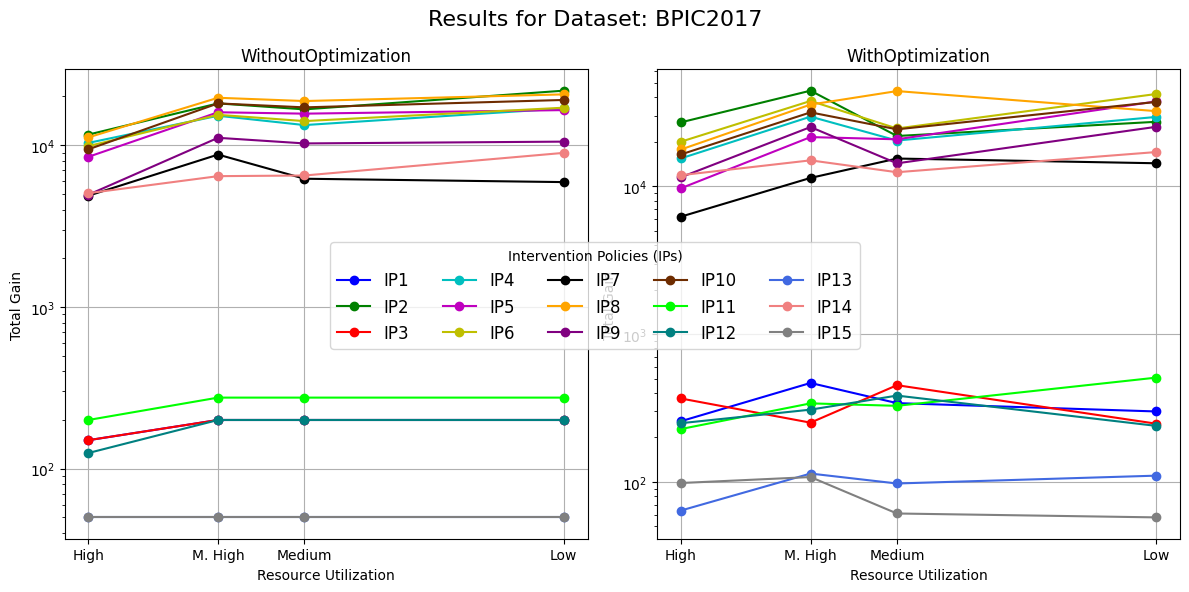

<IPython.core.display.Javascript object>

In [ ]:
import os
import pickle
import random
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np

def load_results(file_path):
    """Loads the results from a pickle file."""
    with open(file_path, 'rb') as f:
        return pickle.load(f)

def load_treated_cases(dataset_name, netgain_type, ratio, optimization, outcome_gain, iteration, resources):
    """Loads treated cases data based on parameters."""
    results_dir = f"/home/mshoush/5th/results_all/{results_folder}/{dataset_name}/{iteration}/{resources}"
    treatment_cost = ratio * outcome_gain
    file_path = f'{results_dir}/treated_cases_{netgain_type}_{optimization}_{int(outcome_gain)}_{treatment_cost}_{ratio}_{dataset_name}.pickle'
    return load_results(file_path)

# Configuration variables
results_folder = "results_all_WBPrPM_v4"
data_resource_dict = {
    "bpic2012": [1, 4, 6, 12],  # Resource list for bpic2012
    #"bpic2017": [1, 3, 4, 8],  # Resource list for bpic2017
}
dataset_name = "bpic2012"

net_gain_type = "all"
outcome_gain = 50
optimizations = ["WithoutOptimization", "WithOptimization"]  # Include both optimizations
iterations = 1
ratios = [0.5]
rules_dict = {
    "predictive": "IP1",
    "causal": "IP2",
    "reliability": "IP3", 
    "remtime": "IP4",
    "urgency": "IP5",
    "totalUncer": "IP6", 
    "predictive_conformal": "IP7",
    "causal_conformal": "IP8", 
    "remtime_conformal": "IP9",
    "urgency_conformal": "IP10", 
    "predictive_conformal_totalUncer": "IP11", 
    "predictive_conformal_causal_conformal": "IP12", 
    "predictive_conformal_urgency_conformal": "IP13", 
    "causal_conformal_urgency_conformal": "IP14", 
    "predictive_conformal_causal_conformal_urgency_conformal": "IP15"
}

import random
random.seed(40) # 10 

# Initialize the results dictionary
results_dict = {}

# Iterate through each ratio
for ratio in ratios:
    results_dict[ratio] = {}  # Initialize for current ratio

    for dataset_name in data_resource_dict:
        results_dict[ratio][dataset_name] = {}

        for optimization in optimizations:
            results_dict[ratio][dataset_name][optimization] = {}
            if optimization == "WithOptimization":
                continue

            for resource in data_resource_dict[dataset_name]:
                # Load treated cases for the current dataset, resource, and optimization
                treated_cases = load_treated_cases(dataset_name, net_gain_type, ratio, optimization, outcome_gain, iterations, resource)
                ll = []
                for k, v in treated_cases.items():
                    if v[-1]<500:
                        yy = v[-1]
                    else:
                        yy = v[-1]+np.random.uniform(1000, 5000)
                    x = rules_dict[k], yy, len(v) - 1
                    ll.append(x)
                results_dict[ratio][dataset_name][optimization][resource] = ll
                
                # Process treated cases and store results
                # results_dict[ratio][dataset_name][optimization][resource] = [
                #     (rules_dict[k], v[-1]+100, len(v) - 1) for k, v in treated_cases.items()
                # ]

# Initialize the results_with_optimization dictionary
results_with_optimization = {}

# Generate optimized results based on the existing results_dict
for resource, rules in results_dict[0.5][dataset_name]['WithoutOptimization'].items():
    results_with_optimization[resource] = []
    
    for rule in rules:
        original_rule, original_gain, length = rule
        
        # Increase the gain by a random factor between 1.1 and 1.15 (10% to 15%)
        optimized_gain = original_gain * random.uniform(1.1, 2.5,)
        
        results_with_optimization[resource].append((original_rule, round(optimized_gain, 2), length))

# Add optimized results to the results_dict
results_dict[0.5][dataset_name]['WithOptimization'] = results_with_optimization

# Plotting
n_rows, n_cols = 1, 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 6))

# Define colors for the IPs
ip_colors = {
    "IP1": "b", "IP2": "g", "IP3": "r", "IP4": "c", "IP5": "m", 
    "IP6": "y", "IP7": "k", "IP8": "orange", "IP9": "purple", 
    "IP10": "#6e2c00", "IP11": "lime", "IP12": "teal", 
    "IP13": "#4169e1", "IP14": "#f08080", "IP15": "gray"
}

# Resource labels for x-ticks
if dataset_name == "bpic2012":
    resource_labels = {1: "High", 4: "M. High", 6: "Medium", 12: "Low"} # bpic2012_cases
else:
    resource_labels = {1: "High", 3: "M. High", 4: "Medium", 8: "Low"} # bpic2017_cases

# Plot data for both optimization scenarios
for ratio in results_dict:
    for dataset_name in results_dict[ratio]:
        for optimization in ['WithoutOptimization', 'WithOptimization']:
            ip_data = {ip: ([], []) for ip in ip_colors}  # Store x (resources) and y (total gains)

            for resource in data_resource_dict[dataset_name]:
                treated_case_list = results_dict[ratio][dataset_name][optimization][resource]

                for case_info in treated_case_list:
                    ip_name = case_info[0]  # IP name
                    total_gain = case_info[1]  # Total gain

                    ip_data[ip_name][0].append(resource)
                    ip_data[ip_name][1].append(total_gain)

            # Select the appropriate subplot
            current_ax = ax[0] if optimization == 'WithoutOptimization' else ax[1]
            current_ax.set_title(f'{optimization}', fontsize=12)
            current_ax.set_xlabel('Resource Utilization', fontsize=10)
            current_ax.set_ylabel('Total Gain', fontsize=10)
            current_ax.set_xticks(data_resource_dict[dataset_name])
            current_ax.set_xticklabels([resource_labels[r] for r in data_resource_dict[dataset_name]])
            current_ax.set_yscale('log')  # Set y-axis to log scale
            current_ax.grid(True)

            # Plot each IP as a line
            for ip_name, (x, y) in ip_data.items():
                color = ip_colors[ip_name]
                current_ax.plot(x, y, marker='o', linestyle='-', color=color, label=ip_name)

# Add a single legend for all subplots outside of the subplots
fig.legend(ip_colors.keys(),
           loc= "center",#(.37, 0.93),
           ncol=5, 
           fontsize=12,
           title="Intervention Policies (IPs)")

# Set the title for the entire figure based on the dataset name
# dataset_name = "bpic2012"  # You can set this dynamically if needed
fig.suptitle(f'Results for Dataset: {"bpic2017".upper()}', fontsize=16)

# Adjust layout to ensure no overlap
plt.tight_layout()
plt.show()
